## Note: All plots should meet the basic requirements of scientific plotting. For example, having title, x-axis, y-axis, legend... Interpretation of plots can get full points as long as they make sense.

## Q0: import the dataset to a pandas dataframe

In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as py
##TODO
mds = pd.read_csv("movie_metadata.csv")
print("mds ready. all datasets ready")
mds

mds ready. all datasets ready


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


## Q1. Historgam.
### Plot the histogram of movie durations. Note: plot only movies with a duration of less than or equal to 240 minutes. Use a bin size of 30.

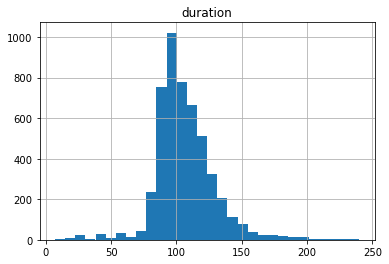

In [2]:
##TODO
q1mds = mds.query('duration <= 240')
hist = q1mds.hist(column = 'duration', bins = 30)

## Q2. Side-by-side box plot.
### Generate a side-by-side box plot to show the distribution of the number of critic reviews on four rating categories: PG-13, PG, G, and R. What insights can you get from the plot?

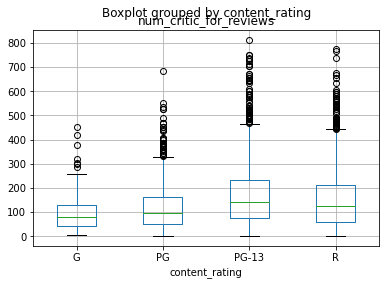

In [3]:
targetratings = ['PG-13', 'PG', 'G', 'R']
q2mds = mds.loc[mds['content_rating'].isin(targetratings)]

boxplot = q2mds.boxplot(column = 'num_critic_for_reviews', by='content_rating')


In [4]:
##TODO 

insights = 'PG-13 movies have the highest average number of reviews, and appear to also have the highest no of reviews as well. Followed by R, then PG, then G'
print('Insights:\t', insights)

Insights:	 PG-13 movies have the highest average number of reviews, and appear to also have the highest no of reviews as well. Followed by R, then PG, then G


## Q3. QQ plot.
### We want to specifically compare the distribution of the number of critic reviews on two rating categories: R and PG-13. Generate a QQ plot and make comparisons on the two distributions from the plot. What insights can you get from the plot?

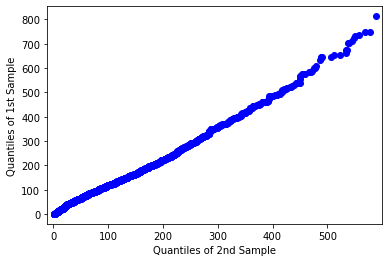

In [5]:
##TODO
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
q3p13 = mds[mds["content_rating"] == "PG-13"]["num_critic_for_reviews"]
q3r = mds[mds["content_rating"] == "R"]["num_critic_for_reviews"]
pp_13 = sm.ProbPlot(q3p13)
pp_r = sm.ProbPlot(q3r)
qqplot_2samples(pp_13, pp_r)
plt.show()


In [6]:
##TODO 
insights = 'pg-13 appears to have more insights than R, though the data is mostly equal'
print('Insights:\t', insights)

Insights:	 pg-13 appears to have more insights than R, though the data is mostly equal


## Q4. Scatter plot.
### Now we pay our attention to movies that are rated as 'G'.  Generate a scatter plot on the number of critic reviews and the number of user reviews. Use colors to show the IMDb scores. What insights can you get from the plot?


<AxesSubplot:xlabel='num_critic_for_reviews', ylabel='num_user_for_reviews'>

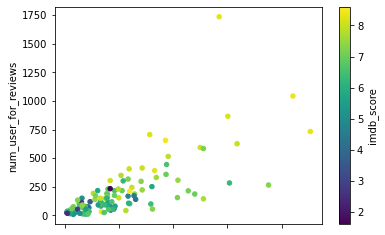

In [7]:
##TODO
q4mds = mds[mds["content_rating"] == "G"]
q4mds.plot.scatter(x = 'num_critic_for_reviews', y = 'num_user_for_reviews', c='imdb_score', colormap = 'viridis')

In [8]:
##TODO 
insights = 'high user reviews typically indicates a good score, high critic reviews indicates a decent score but does not matter as much as user, but having low numbers of each usually indicates a bad score.'
print('Insights:\t', insights)

Insights:	 high user reviews typically indicates a good score, high critic reviews indicates a decent score but does not matter as much as user, but having low numbers of each usually indicates a bad score.


## Q5. Star plot.
### We want to compare the number of Facebook likes for the following eight countries: Australia, Canada, France, Germany, India, Spain, UK, and USA. 
### Specifically, we want to draw three curves, each representing one of the following values for all countries: mean of movie_facebook_likes,mean of actor_1_facebook_likes, mean of director_facebook_likes
### Generate a star plot that shows the above information. Each of the equiangular spokes should represent one country.

Hint1: Read https://www.kite.com/python/examples/5561/matplotlib-plot-a-polar-plot 

Hint2: the theta value is in the radian unit, so you might find https://docs.python.org/3/library/math.html#math.radians  useful.

country,Australia,Canada,France,Germany,India,Spain,UK,USA
movie_facebook_likes,10820.890909,2619.484127,4925.824675,5153.835052,2788.411765,8820.575758,8161.720982,7951.244550
actor_1_facebook_likes,4403.054545,2366.344000,4265.642857,6022.247423,1401.030303,5479.666667,5775.772321,7304.406258
director_facebook_likes,194.358491,139.056911,322.197368,291.577320,64.470588,842.121212,273.891705,823.105545


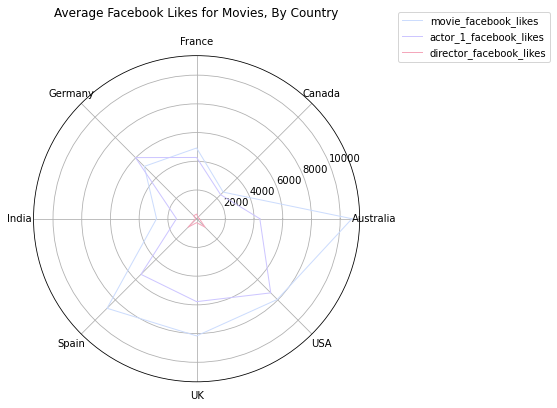

In [57]:
#### TODO
import numpy as np
#step 1: we get data from only the above 8 countries, and only the 3 columns needed. groupby and find mean
targetcountries = ['USA', 'UK', 'Spain', 'India', 'Germany', 'France', 'Canada', 'Australia']
q5mds = mds.loc[mds['country'].isin(targetcountries)]
modmds = q5mds[['movie_facebook_likes', 'actor_1_facebook_likes', 'director_facebook_likes', 'country']]
modmds = modmds.groupby('country').mean()

#transpose step
modmdsT = modmds.transpose()
#step2: star plot
labels = ['Australia','Canada','France','Germany','India','Spain','UK','USA']
points = len(labels)

angles = np.linspace(0, 2 * np.pi, points, endpoint=False).tolist()
angles += angles[:1]

def addVal(liketype, color, label=None):
    values = modmdsT.loc[liketype].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=liketype)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
addVal("movie_facebook_likes", '#ccdcfd', "Movie Facebook Like Average")
addVal("actor_1_facebook_likes", '#cdc6ff', "Actor Facebook Like Average")
addVal("director_facebook_likes", '#f4a7bb', "Director Facebook Like Average")

# Add title and legend
ax.set_title('Average Facebook Likes for Movies, By Country', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.15))

# Draw axis lines for each angle and label.
ax.set_thetagrids([0,45,90,135,180,225,270,315], labels)

modmdsT

In [32]:
##TODO 
insights = 'directors do not get likes :D other than that, it appears Australia, USA, UK, and Spain get by far the most movie facebook likes on average, with similar results for Actor, with an exception for Germany.'
print('Insights:\t', insights)

Insights:	 directors do not get likes :D other than that, it appears Australia, USA, UK, and Spain get by far the most movie facebook likes on average, with similar results for Actor, with an exception for Germany.
